<a href="https://colab.research.google.com/github/Medhashah03/SYNAPSE_LP/blob/Week-3/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3**

## **DJS Synapse Learning Period**
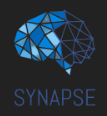

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [4]:
#write code here
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")
df_path = "/content/gdrive/My Drive/synapse_w3/titanic_data.csv"
df = pd.read_csv(df_path)

Mounted at /content/gdrive


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [5]:


def normalize(data_list):
    X_new = []
    X_max = max(data_list)
    X_min = min(data_list)
    for i in data_list:
      X_new.append( (i - X_min)/(X_max - X_min) )
    return X_new



def titanic(df):
  #enter preprocessing steps as done in task 1
  df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
  df.drop(["Cabin"], axis=1, inplace=True)
  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
  df["Age"].fillna(df["Age"].mean(), inplace=True)
  df["Family_members"] = df["SibSp"] + df["Parch"]
  df.drop(["SibSp", "Parch"], axis=1, inplace=True)
  
  df["Age"] = normalize(df["Age"])
  df["Fare"] = normalize(df["Fare"])
  df["Family_members"] = normalize(df["Family_members"]) 
  #make sure the preprocessed dataframe looks like the output in task 1 solution NB
  #return the dataframe
  
  return df
trained = titanic
titanic(df)
#remove this line after writing the code

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_members
0,0,3,male,0.271174,0.014151,S,0.1
1,1,1,female,0.472229,0.139136,C,0.1
2,1,3,female,0.321438,0.015469,S,0.0
3,1,1,female,0.434531,0.103644,S,0.1
4,0,3,male,0.434531,0.015713,S,0.0
...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0.025374,S,0.0
887,1,1,female,0.233476,0.058556,S,0.0
888,0,3,female,0.367921,0.045771,S,0.3
889,1,1,male,0.321438,0.058556,C,0.0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [6]:
#write code here
y_label = df['Survived']


<b>remove the y_label (survived) from the dataframe</b>

In [7]:
#write code here
df.drop(['Survived'],axis=1, inplace=True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [8]:
#write code here
from sklearn.model_selection import train_test_split
X= df.select_dtypes(include=['float64','int64'])
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3, random_state=1)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [9]:
#write code here
from sklearn.tree import DecisionTreeClassifier
col_names = df.columns.values
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

<b>print the test accuracy and train accuracy here</b>

In [10]:
#write code here
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6716417910447762


In [12]:

dict ={}
for max_d in range(1,45):
  clf = DecisionTreeClassifier(max_depth=max_d)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  a= metrics.accuracy_score(y_test, y_pred)
  dict[max_d] = a



Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [16]:
#write code here
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
clf= RandomForestClassifier(n_estimators= 10, criterion="entropy",max_depth=3, random_state=0)  
clf.fit(X_train, y_train)  
y_pred= clf.predict(X_test) 
#cm= confusion_matrix(y_test, y_pred)  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753731343283582


### 2. Boosting

In [13]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
AdaBoostClassifier(n_estimators=100, random_state=0)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6567164179104478


### 3. Pruning Techniques

In [22]:
#write code h

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.05377199988207698


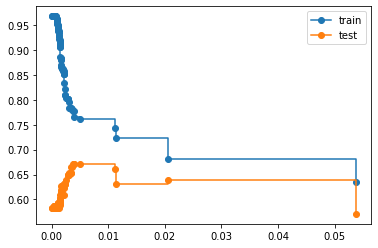

In [25]:
import matplotlib.pyplot as plt

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()

ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [36]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.6305970149253731

## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.


*Your answer here (Double click to type)*

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Naive Bayes Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2022 - 2023